In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ribeira grande pt
qaanaaq gl
klaksvik fo
atuona pf
ushuaia ar
vanimo pg
rio grande br
havre-saint-pierre ca
mar del plata ar
puerto ayora ec
aksum et
kungsbacka se
ushuaia ar
mar del plata ar
balakhta ru
albany au
dzaoudzi yt
lagoa pt
albany au
port elizabeth za
port alfred za
uige ao
bluff nz
meulaboh id
san patricio mx
dikson ru
belushya guba ru
georgetown sh
klaksvik fo
rikitea pf
pevek ru
vaini to
chuy uy
jining cn
shchuchye ru
inirida co
phan rang vn
aldan ru
san patricio mx
murgab tm
esperance au
busselton au
chinsali zm
lagoa pt
bremervorde de
cape town za
seymchan ru
marcona pe
volodarka ua
ostrovnoy ru
amderma ru
cabo san lucas mx
srednekolymsk ru
ushuaia ar
gwanda zw
punta arenas cl
mar del plata ar
port elizabeth za
banbury gb
kapaa us
constitucion mx
busselton au
ahipara nz
victoria sc
hobart au
saint-philippe re
suntar ru
rikitea pf
borogontsy ru
dingle ie
ushuaia ar
bengkulu id
chuy uy
padang id
butaritari ki
charters towers au
seoul kr
malanje ao
yerbogachen ru
ballina i

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
import requests
requests.__version__

'2.26.0'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aa60fef149152667459caf0d1028b9e7


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | vanimo
Processing Record 7 of Set 1 | rio grande
Processing Record 8 of Set 1 | havre-saint-pierre
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | aksum
Processing Record 12 of Set 1 | kungsbacka
Processing Record 13 of Set 1 | balakhta
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | dzaoudzi
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | uige
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | meulaboh
Processing Record 22 of Set 1 | san patricio
Processing Record 23 of Se

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,58.53,54,100,18.77,PT,2021-12-13 00:06:10
1,Qaanaaq,77.4840,-69.3632,-3.91,72,76,4.79,GL,2021-12-13 00:06:10
2,Klaksvik,62.2266,-6.5890,40.12,91,100,15.46,FO,2021-12-13 00:06:10
3,Atuona,-9.8000,-139.0333,79.14,79,25,18.50,PF,2021-12-13 00:06:11
4,Ushuaia,-54.8000,-68.3000,40.06,73,55,10.36,AR,2021-12-13 00:04:12
5,Vanimo,-2.6741,141.3028,83.21,77,100,6.42,PG,2021-12-13 00:06:11
6,Rio Grande,-32.0350,-52.0986,73.51,77,0,15.66,BR,2021-12-13 00:06:11
7,Havre-Saint-Pierre,50.2334,-63.5986,28.89,67,54,36.60,CA,2021-12-13 00:06:12
8,Mar Del Plata,-38.0023,-57.5575,65.88,84,100,11.01,AR,2021-12-13 00:04:13
9,Puerto Ayora,-0.7393,-90.3518,68.56,96,99,4.00,EC,2021-12-13 00:05:28


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
import time

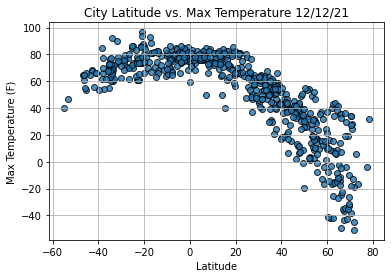

In [26]:
plt.scatter(lats, max_temps, 
            edgecolor="black", 
            linewidths = 1, marker = "o", 
            alpha = 0.8, label = "Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Save the figure.
plt.show()

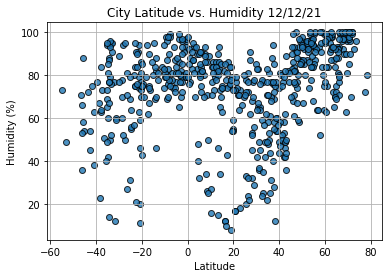

In [32]:
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker = "o",
            label="Cities", alpha=0.8)
    
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("weather_data/Fig2.png")
plt.show()

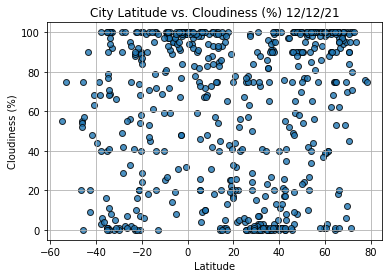

In [37]:
plt.scatter(lats, cloudiness, edgecolors= "Black",
linewidths=1, marker = "o", label="Cities", alpha =0.8)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

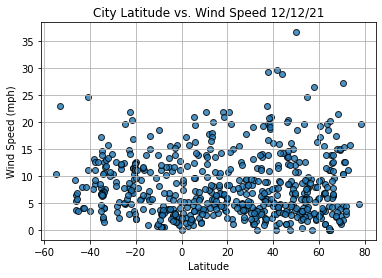

In [54]:
plt.scatter(lats, wind_speed,edgecolors= "Black",
linewidths=1, marker = "o", label="Cities", alpha =0.8)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [55]:
from scipy.stats import linregress

In [56]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_value, y_value, title, y_label, text_coords):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_value,y_value)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_value * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, "r")
    plt.annotate(line_eq, text_coords, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

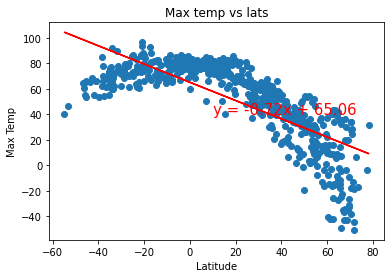

In [57]:
plot_linear_regression(lats, max_temps, "Max temp vs lats", "Max Temp" ,(10,40) )

In [82]:
north_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
south_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Atuona,-9.8000,-139.0333,79.14,79,25,18.50,PF,2021-12-13 00:06:11
4,Ushuaia,-54.8000,-68.3000,40.06,73,55,10.36,AR,2021-12-13 00:04:12
5,Vanimo,-2.6741,141.3028,83.21,77,100,6.42,PG,2021-12-13 00:06:11
6,Rio Grande,-32.0350,-52.0986,73.51,77,0,15.66,BR,2021-12-13 00:06:11
8,Mar Del Plata,-38.0023,-57.5575,65.88,84,100,11.01,AR,2021-12-13 00:04:13


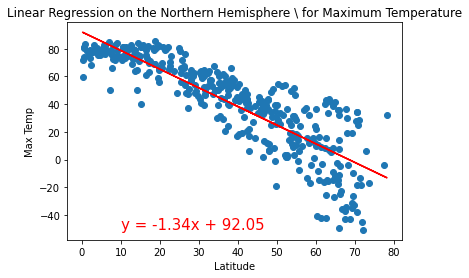

In [70]:
# Linear regression on the Northern Hemisphere
x_value = north_hemi_df["Lat"]
y_value = north_hemi_df["Max Temp"]

plot_linear_regression(x_value, y_value, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature',
                        'Max Temp', (10,-50))

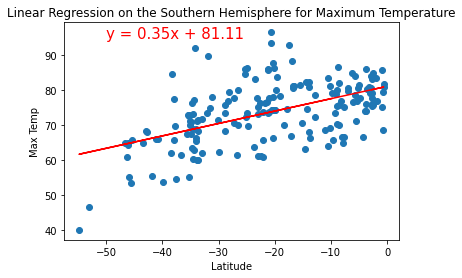

In [74]:
x_value = south_hemi_df["Lat"]
y_value = south_hemi_df["Max Temp"]

plot_linear_regression(x_value, y_value,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,95))

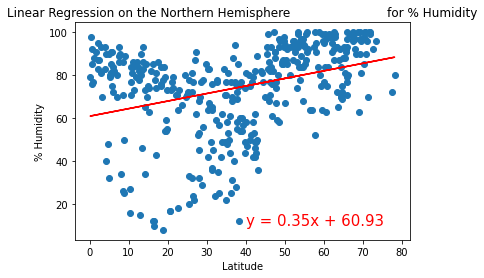

In [75]:
# Linear regression on the Northern Hemisphere
x_value = north_hemi_df["Lat"]
y_value = north_hemi_df["Humidity"]

plot_linear_regression(x_value,y_value,'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

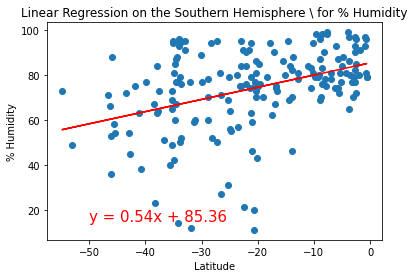

In [80]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

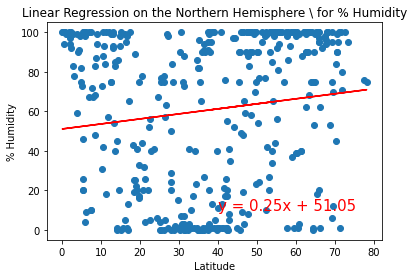

In [83]:
# Linear regression on the Northern Hemisphere
x_value = north_hemi_df["Lat"]
y_value = north_hemi_df["Cloudiness"]

plot_linear_regression(x_value,y_value,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

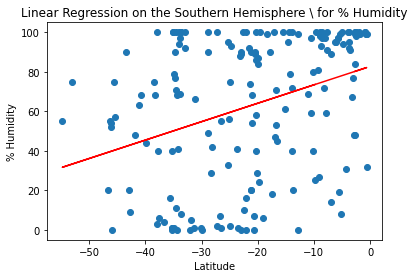

In [84]:
x_value = south_hemi_df["Lat"]
y_value = south_hemi_df["Cloudiness"]

plot_linear_regression(x_value,y_value,'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(40,10))

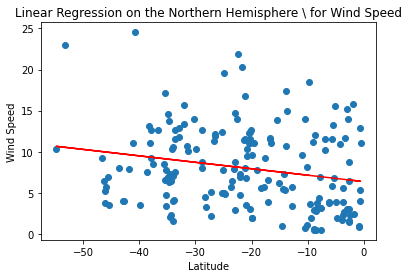

In [85]:
# Linear regression on the Northern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(40,35))

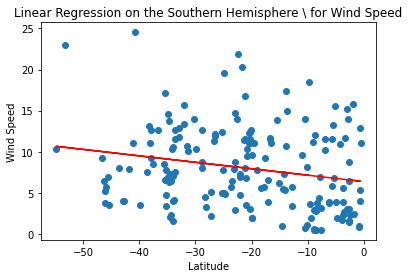

In [87]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,35))